Import matplotlib and scipy

In [32]:
%matplotlib inline
import matplotlib.pyplot as p

In [33]:
from sympy import *
import scipy as sc
init_printing() # for pretty-printing equations etc

__Symbolic variables__

In [34]:
# Create a new symbloc variable
x = var('x')
type(x) # check it's class

sympy.core.symbol.Symbol

In [35]:
# Define multiple variables at once
a, b, c = var("a, b, c")

In [36]:
# Add assumptions (constraints) to variable x
x = var('x', real=True)

In [37]:
# Check if x is real or imaginary
x.is_imaginary

False

In [38]:
# Create variable x, which is a symbol for a positive value
x = Symbol('x', positive=True)

In [39]:
x > 0

In [40]:
x < 0

__Symbolic equations__

In [54]:
# Create a function (mathmatical equation)
MyFun = (pi + x)**2; MyFun

In [51]:
N_0 = var('N_0')
N_max = var('N_max')
r_max = var('r_max')
t_lag = var('t_lag')
t = var('t')

MyFun = N_0 + (N_max - N_0) * exp(-exp(r_max * exp(1) * (t_lag - t)/((N_max - N_0) * log(10)) + 1))

In [64]:
latex(MyFun)

'\\left(x + \\pi\\right)^{2}'

In [65]:
print(latex(MyFun))

\left(x + \pi\right)^{2}


__Numerical evaluation__

In [66]:
pi.evalf(n=100) # pi to a 100 places after decimal!

In [67]:
N(pi, 50) # N() is the shorthand alias for evalf()

In [68]:
# Using evalf with our function
N(MyFun, 5)

In [69]:
 MyFun.subs(x, 1.5) # use subs function to subsitute a symbol with a numerical value

In [70]:
 MyFun.subs(x, a+pi) # The subs function can also be used to substitute mathematical variables or expressions.

In [71]:
MyFun_new = MyFun.subs(x, a+pi); MyFun_new # Assign above as a new symbolic equation

In [72]:
x_vec = sc.arange(0, 10, 0.1) # Numerically evaluate the function over a range of values using NumPy arrays

/tmp/ipykernel_10258/3660578478.py:1: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  x_vec = sc.arange(0, 10, 0.1) # Numerically evaluate the function over a range of values using NumPy arrays


In [73]:
MyFun_vec = sc.array([N(MyFun.subs(x, xx)) for xx in x_vec])

/tmp/ipykernel_10258/4244912379.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  MyFun_vec = sc.array([N(MyFun.subs(x, xx)) for xx in x_vec])


In [74]:
MyFun_new_vec = sc.array([N((MyFun_new).subs(a, xx)) for xx in x_vec]) # Evaluate the new function MyFun_new we created by substitution above

/tmp/ipykernel_10258/348476544.py:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  MyFun_new_vec = sc.array([N((MyFun_new).subs(a, xx)) for xx in x_vec]) # Evaluate the new function MyFun_new we created by substitution above


NameError: name 'plt' is not defined

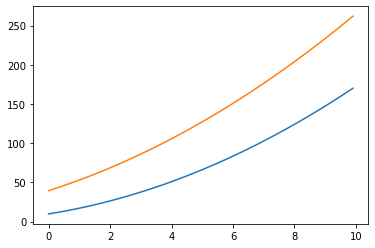

In [87]:
# Plot the two functions 
fig, ax = p.subplots()
ax.plot(x_vec, MyFun_vec)
ax.plot(x_vec, MyFun_new_vec)

A more efficient way to do the above using lambdify() to “compile” a Sympy expression into a function that is much more efficient to evaluate numerically

In [92]:
MyFun_lamb = lambdify([x], MyFun, 'numpy')

In [93]:
MyFun_vec = MyFun_lamb(x_vec)

In [96]:
%%timeit #test how long the above function works

MyFun_vec = sc.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

<magic-timeit>:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead


14.8 ms ± 358 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


__Fundamental mathematical operations__

*Expand and factor*

In [99]:
#The expand function takes a number of keywords arguments which we can tell the functions what kind of expansions to want to perform
expand(MyFun)

In [100]:
print(expand(MyFun)) # print in raw python form

x**2 + 2*pi*x + pi**2


In [98]:
factor(x**2 + 2*pi*x + pi**2) # factorise

*Apart and together*

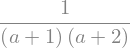

In [101]:
f1 = 1/((a+1)*(a+2)); f1

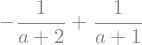

In [102]:
apart(f1)

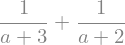

In [103]:
f2 = 1/(a+2) + 1/(a+3); f2

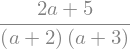

In [104]:
together(f2)

The simplify tries to simplify an expression into a nice looking expression

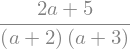

In [105]:
simplify(f2)

Differentiation: the first argument is the expression to take the derivative of, and the second argument is the symbol by which to take the derivative.

In [106]:
diff(MyFun_new, a)

In [107]:
diff(MyFun_new, a, a) # higher order derivatives 

In [108]:
diff(MyFun_new**2, a, 2) # same as above

In [109]:
expand(diff(MyFun_new**2, a, 2)) # apply another manipulation to the result of a previous operation

Calculate the derivative of a multivariate expression:

In [110]:
x, y, z = var("x,y,z")

In [111]:
f = sin(x*y) + cos(y*z)

In [112]:
diff(f, x, 1, y, 2)

__Integration__

In [113]:
MyFun

In [114]:
integrate(MyFun, x)

In [115]:
# By providing limits for the integration variable we can evaluate definite integrals:
integrate(MyFun, (x, -1, 1))

In [116]:
integrate(exp(-x**2), (x, -oo, oo)) # And also improper integrals. oo is the SymPy notation for inifinity.

__Sums and products__

Note that this function is named Sum and not sum to avoid namespace conflict.

In [117]:
n = var("n")

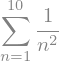

In [118]:
Sum(1/n**2, (n, 1, 10))

In [119]:
Sum(1/n**2, (n,1, 10)).evalf()

In [120]:
Sum(1/n**2, (n, 1, oo)).evalf()

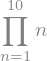

In [121]:
# Product works much in the same way
Product(n, (n, 1, 10)) # 10!

__Limits__

In [123]:
limit(sin(x)/x, x, 0)

We can use ‘limit’ to check the result of derivation using the diff function:

In [124]:
f 

In [125]:
diff(f, x)

In [126]:
h = var("h")

In [127]:
limit((f.subs(x, x+h) - f)/h, h, 0)

change direction from which we approach the limiting point using the dir keywork argument:

In [129]:
 limit(1/x, x, 0, dir="+") 

In [130]:
limit(1/x, x, 0, dir="-")

__Series__

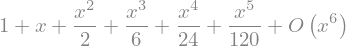

In [132]:
series(exp(x), x) # series expansion

By default it expands the expression around x=0, but we can expand around any value of by explicitly include a value in the function call:

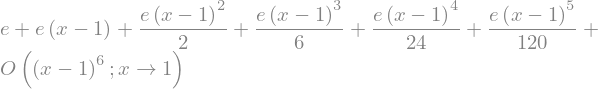

In [133]:
series(exp(x), x, 1)

In [138]:
# or ..
series(log(x), x, 0) # will not work why?

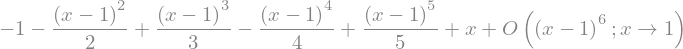

In [135]:
series(log(x), x,1) # this will work, however 

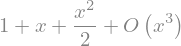

In [139]:
# explicitly define to which order the series expansion should be carried out:
series(exp(x), x, 0, 3)

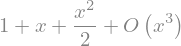

In [141]:
exp(x).series(x,0,3) # another way to do the above

The series expansion includes the order of the approximation, which is very useful for keeping track of the order of validity when we do calculations with series expansions of different orders:

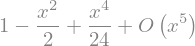

In [142]:
s1 = cos(x).series(x, 0, 5); s1

In [143]:
s2 = sin(x).series(x, 0, 2); s2

In [144]:
expand(s1 * s2)

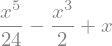

In [147]:
expand(s1.removeO() * s2.removeO()) # use remove0 method to get rid of the order info

__Matrix algebra__

In [150]:
m11, m12, m21, m22 = var("m11, m12, m21, m22")
b1, b2 = var("b1, b2")

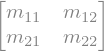

In [151]:
A = Matrix([[m11, m12],[m21, m22]]) # Again, note: capital M for to avoid namespace conflict
A

In [152]:
b = Matrix([[b1], [b2]]); b

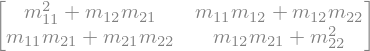

In [154]:
# matrix algebra operations:
A**2

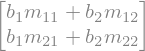

In [155]:
A * b

In [156]:
A.det() # calculate determinants

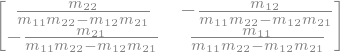

In [157]:
A.inv() # calculate the inverses 

__Solving equations__

In [158]:
solve(x**2 - 1, x)

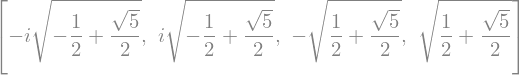

In [159]:
solve(x**4 - x**2 - 1, x)

In [160]:
solve([x + y - 1, x - y - 1], [x,y]) # system of equations

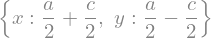

In [161]:
solve([x + y - a, x - y - c], [x,y]) # In terms of other symbolic expressions

 __Some biological examples__

One population: Exponential growth:

In [163]:
# Assaign variables
r_max, N_0, K, t_lag, t  = var("r_max N_0 K t_lag t",real = True) # the real bit is not really necessary here

N_0 + (K - N_0) * exp(-exp(r_max * exp(1) * (t_lag - t)/((K - N_0) * log(10)) + 1))

r_m, N, t = var("r_m N t",real = True) # the real bit is not really necessary here

In [164]:
N = Function('N') # tells SymPy that N is a function

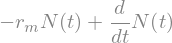

In [165]:
dN_dt = Derivative(N(t), t) - r_m*N(t); dN_dt # Define N as a derivative of t

In [166]:
MyEq_sol = dsolve(dN_dt); MyEq_sol # Solve differnetial equation 

/tmp/ipykernel_10258/2988519378.py:10: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  t_vec = sc.arange(0, 10., 0.01)
/tmp/ipykernel_10258/2988519378.py:23: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  p.plot(t_vec, N_0 * sc.exp(r_m * t_vec),'k--')


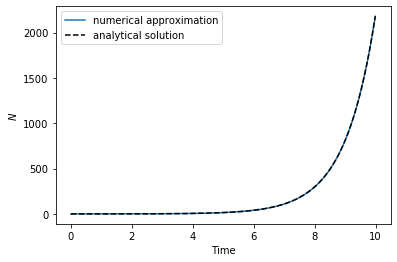

In [167]:
# Plot the model

from scipy  import integrate

# parameters
r_m = 1.

# initial conditions
N_0 = 0.1

# The time vector
t_vec = sc.arange(0, 10., 0.01)

def exp_pop(N, t, r_m):
    """The right-hand side of the exponential growth ODE"""
    return r_m*N

N_vec = integrate.odeint(exp_pop, N_0, t_vec, args=(r_m,)) # the comma is needed!

# plot the numerical solution
p.plot(t_vec, N_vec)
p.xlabel('Time') ; p.ylabel('$N$') 

# plot analytical solution
p.plot(t_vec, N_0 * sc.exp(r_m * t_vec),'k--')
p.legend(['numerical approximation', 'analytical solution'], loc='best') # draw legend

In [168]:
N_vec - N_0 * sc.exp(r_m * t_vec) # more detailed info

/tmp/ipykernel_10258/3181542708.py:1: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  N_vec - N_0 * sc.exp(r_m * t_vec) # more detailed info


array([[ 0.00000000e+00, -1.00501671e-03, -2.02013400e-03, ...,
        -2.13744854e+03, -2.15893125e+03, -2.18062988e+03],
       [ 1.00502283e-03,  6.11819401e-09, -1.01511118e-03, ...,
        -2.13744753e+03, -2.15893025e+03, -2.18062887e+03],
       [ 2.02014197e-03,  1.01512526e-03,  7.96376975e-09, ...,
        -2.13744651e+03, -2.15892923e+03, -2.18062786e+03],
       ...,
       [ 2.13744963e+03,  2.13744863e+03,  2.13744761e+03, ...,
         1.09563845e-03, -2.14816243e+01, -4.31802491e+01],
       [ 2.15893236e+03,  2.15893136e+03,  2.15893034e+03, ...,
         2.14838268e+01,  1.10688877e-03, -2.16975180e+01],
       [ 2.18063100e+03,  2.18062999e+03,  2.18062898e+03, ...,
         4.31824631e+01,  2.16997432e+01,  1.11834951e-03]])

One population: Logistic Population growth:

In [170]:
# Define the variables and the function
r_m, K, N, t = var("r_m K N t",real = True) # the real bit is not really necessary here

N = Function('N')

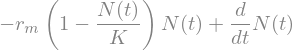

In [171]:
dN_dt = Derivative(N(t), t) - r_m * N(t) * (1 - N(t) / K); dN_dt

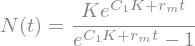

In [172]:
MyEq_sol = dsolve(dN_dt); MyEq_sol

/tmp/ipykernel_10258/2063636648.py:10: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  t_vec = sc.arange(0, 10., 0.01)
/tmp/ipykernel_10258/2063636648.py:22: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  p.plot(t_vec, K * N_0 * sc.exp(r_m * t_vec)/(K + N_0 * (sc.exp(r_m * t_vec) - 1.)),'k--')


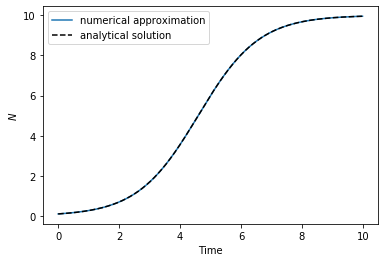

In [173]:
# plot
from scipy  import integrate

# parameters
r_m = 1.
K = 10.
# initial condition
N_0 = 0.1

#The time vector 
t_vec = sc.arange(0, 10., 0.01)

def log_pop(N, t, r_m, K):
    """The right-hand side of the logistic ODE"""
    return r_m*N*(1-N/K)

N_vec = integrate.odeint(log_pop, N_0, t_vec, args=(r_m, K));

p.plot(t_vec, N_vec) # plot the solution
p.xlabel('Time') ; p.ylabel('$N$') 

# plot analytical solution
p.plot(t_vec, K * N_0 * sc.exp(r_m * t_vec)/(K + N_0 * (sc.exp(r_m * t_vec) - 1.)),'k--')
p.legend(['numerical approximation', 'analytical solution'], loc='best') # draw legend

Two interacting populations- The Lotka-Volterra predator-prey model:

In [178]:
# define vars
r_m, a, e, z, K, N, C, t = var("r_m, a, e, z, K, N, C, t",real = True)

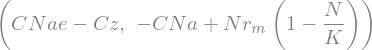

In [177]:
# define the sysyem of ODEs for Sympy:
dN_dt = r_m * N *(1-N/K) - a * N * C
dC_dt = e * a * N * C - z * C

dC_dt, dN_dt

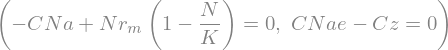

In [183]:
# Now define the equilibrium state:
N_eqlb = Eq(dN_dt, 0)
C_eqlb = Eq(dC_dt, 0)
N_eqlb, C_eqlb

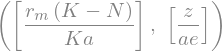

In [184]:
# solve
N_eqlb_sol = solve(N_eqlb, C)
C_eqlb_sol = solve(C_eqlb, N)

N_eqlb_sol, C_eqlb_sol


In [185]:
# numerical integration (similar to LV.py)
from scipy import integrate

t_vec = sc.arange(0, 100., 0.01)

# parameters
r_m = 1.
a = 1
e = 0.5
z = .5
K =10

# initial condition: this is an array now!
N0C0 = sc.array([1., 1.])

# the function still receives only `x`, but it will be an array, not a number
def LV(NC, t, r_m, K, a, e, z):
    # Unlike the esponental and logistic growth model, we now need to convert 
    # the output to a numpy array as it has two populations.
    return sc.array([ r_m * NC[0]*(1-NC[0]/K) - a * NC[0] * NC[1],
                   e * a * NC[0] * NC[1] - z * NC[1] ])

NC_vec = integrate.odeint(LV, N0C0, t_vec, (r_m, K, a, e, z))

/tmp/ipykernel_10258/2303913698.py:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  t_vec = sc.arange(0, 100., 0.01)
/tmp/ipykernel_10258/2303913698.py:13: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  N0C0 = sc.array([1., 1.])
/tmp/ipykernel_10258/2303913698.py:19: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  return sc.array([ r_m * NC[0]*(1-NC[0]/K) - a * NC[0] * NC[1],


In [186]:
print(NC_vec.shape)

(10000, 2)


In [187]:
print(p.style.available)

['tableau-colorblind10', 'seaborn-muted', 'seaborn-white', 'seaborn-pastel', 'seaborn-talk', 'seaborn-whitegrid', 'Solarize_Light2', '_classic_test', 'fivethirtyeight', 'dark_background', 'grayscale', 'seaborn-colorblind', 'seaborn-bright', 'seaborn-dark-palette', 'ggplot', 'classic', 'seaborn-deep', 'seaborn-dark', 'seaborn-notebook', 'fast', 'seaborn-paper', 'seaborn-ticks', 'bmh', 'seaborn', 'seaborn-darkgrid', 'seaborn-poster']


In [188]:
p.style.use('seaborn-darkgrid')

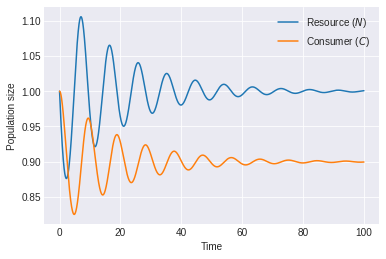

In [189]:
# plot
p.plot(t_vec, NC_vec)
p.xlabel('Time'); p.ylabel('Population size') # and of y-axis
p.legend(['Resource ($N$)', 'Consumer ($C$)'], loc='best')

Initial condition: [1. 1.]


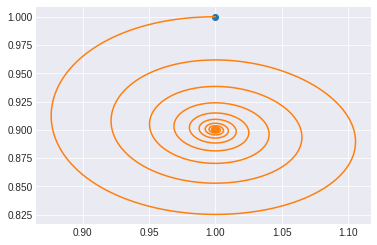

In [190]:
# CHeck the phase space (i.e. plot the dependent variables, without respect to time)
p.plot(NC_vec[0,0], NC_vec[0,1], 'o')
print('Initial condition:', NC_vec[0])

p.plot(NC_vec[:,0], NC_vec[:,1])

#Another solution with a different initial condition:
#NC_vec2 = odeint(LV, [2., 4.], t_vec, (r_m, K, a, e, z))
#p.plot(NC_vec2[:,0], NC_vec2[:,1])
#p.plot(NC_vec2[0,0], NC_vec2[0,1], 'o')
#p.xlabel('Resource Population size'); p.ylabel('Consumer Population size') # and of y-axis